In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:

data = pd.read_csv('src\\Dataset\\Liver Patient Dataset (LPD)_train.csv',encoding= 'unicode_escape')

In [6]:
data.columns = data.columns.str.strip()

In [9]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [3]:
nafld_columns = ['Age of the patient', 'Total Bilirubin', 'ALB Albumin', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase']
lft_columns = ['Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']
albi_columns = ['Total Bilirubin', 'ALB Albumin']

In [7]:
def perform_clustering(data, method_name):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title(f'Elbow Method for {method_name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    silhouette_avg = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        silhouette_avg.append(silhouette_score(data_scaled, kmeans.labels_))
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), silhouette_avg, marker='o')
    plt.title(f'Silhouette Method for {method_name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    optimal_clusters = silhouette_avg.index(max(silhouette_avg)) + 2
    print(f'Optimal number of clusters for {method_name} is {optimal_clusters}')
    
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    
    return clusters


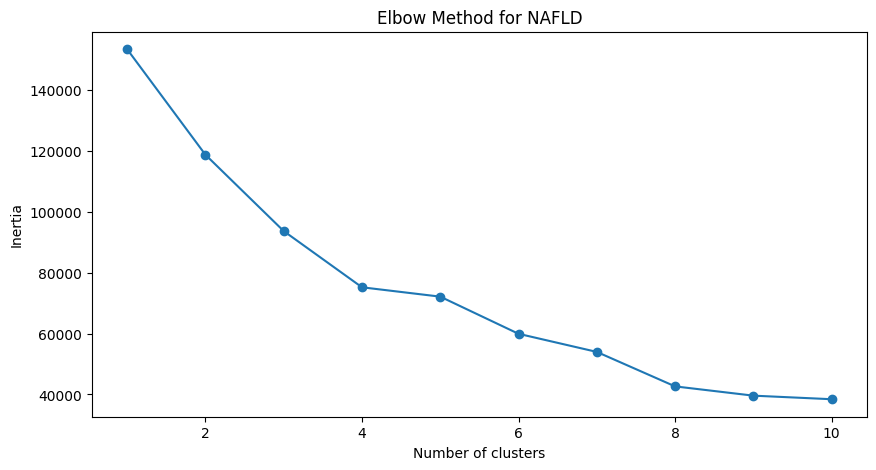

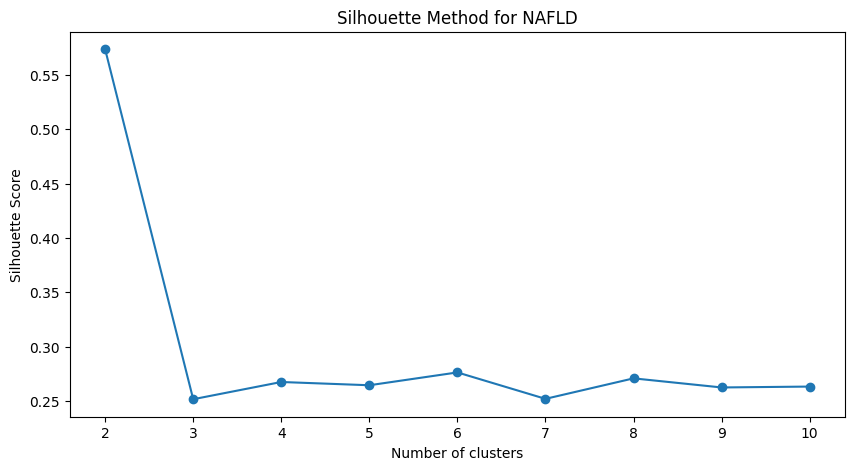

Optimal number of clusters for NAFLD is 2


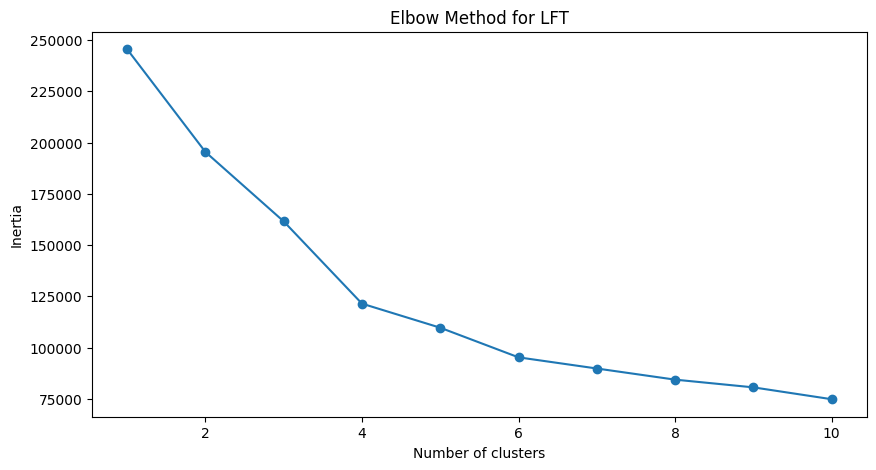

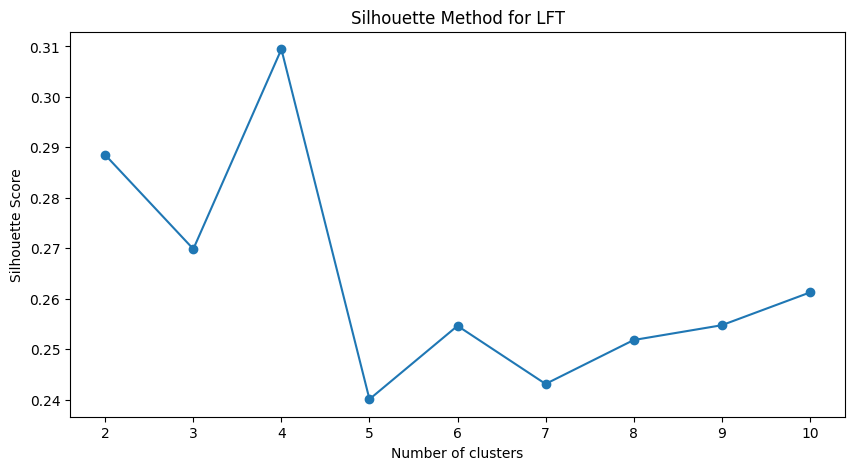

Optimal number of clusters for LFT is 4


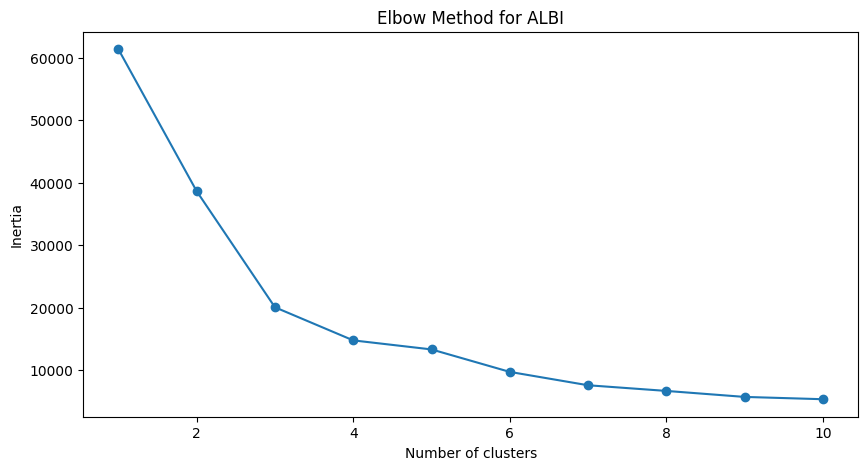

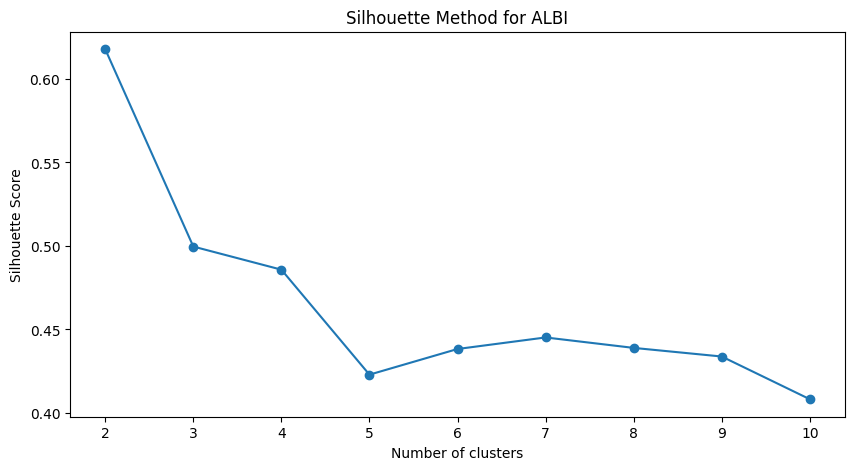

Optimal number of clusters for ALBI is 2


In [10]:

nafld_clusters = perform_clustering(data[nafld_columns], 'NAFLD')
lft_clusters = perform_clustering(data[lft_columns], 'LFT')
albi_clusters = perform_clustering(data[albi_columns], 'ALBI')


In [11]:
data['NAFLD_Cluster'] = nafld_clusters
data['LFT_Cluster'] = lft_clusters
data['ALBI_Cluster'] = albi_clusters


In [12]:
X_nafld = data[nafld_columns]
X_lft = data[lft_columns]
X_albi = data[albi_columns]
y = data['Result']


In [13]:

X_train_nafld, X_test_nafld, y_train, y_test = train_test_split(X_nafld, y, test_size=0.3, random_state=42)
X_train_lft, X_test_lft, _, _ = train_test_split(X_lft, y, test_size=0.3, random_state=42)
X_train_albi, X_test_albi, _, _ = train_test_split(X_albi, y, test_size=0.3, random_state=42)



In [14]:
scaler = StandardScaler()
X_train_nafld = scaler.fit_transform(X_train_nafld)
X_test_nafld = scaler.transform(X_test_nafld)
X_train_lft = scaler.fit_transform(X_train_lft)
X_test_lft = scaler.transform(X_test_lft)
X_train_albi = scaler.fit_transform(X_train_albi)
X_test_albi = scaler.transform(X_test_albi)


In [22]:
from sklearn.calibration import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': LinearSVC(random_state=42, max_iter=10000),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

def evaluate_models(X_train, X_test, y_train, y_test, method_name):
    accuracy_scores = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[model_name] = accuracy
        print(f'{model_name} Accuracy for {method_name}: {accuracy}')
        print(classification_report(y_test, y_pred))
    return accuracy_scores
    

In [23]:

print("NAFLD Method")
nafld_accuracy = evaluate_models(X_train_nafld, X_test_nafld, y_train, y_test, 'NAFLD')


NAFLD Method
Logistic Regression Accuracy for NAFLD: 0.720351867940921
              precision    recall  f1-score   support

           1       0.73      0.97      0.83      6627
           2       0.51      0.08      0.14      2581

    accuracy                           0.72      9208
   macro avg       0.62      0.52      0.49      9208
weighted avg       0.67      0.72      0.64      9208

Random Forest Accuracy for NAFLD: 0.9937011294526499
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      6627
           2       0.99      0.98      0.99      2581

    accuracy                           0.99      9208
   macro avg       0.99      0.99      0.99      9208
weighted avg       0.99      0.99      0.99      9208



C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC Accuracy for NAFLD: 0.7152476107732406
              precision    recall  f1-score   support

           1       0.72      0.99      0.83      6627
           2       0.27      0.01      0.02      2581

    accuracy                           0.72      9208
   macro avg       0.49      0.50      0.43      9208
weighted avg       0.59      0.72      0.60      9208

Naive Bayes Accuracy for NAFLD: 0.5338835794960903
              precision    recall  f1-score   support

           1       0.94      0.37      0.54      6627
           2       0.37      0.94      0.53      2581

    accuracy                           0.53      9208
   macro avg       0.66      0.66      0.53      9208
weighted avg       0.78      0.53      0.54      9208

K-Nearest Neighbors Accuracy for NAFLD: 0.8482841007819287
              precision    recall  f1-score   support

           1       0.89      0.90      0.90      6627
           2       0.74      0.71      0.73      2581

    accuracy                 

C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
print("\nLFT Method")
lft_accuracy = evaluate_models(X_train_lft, X_test_lft, y_train, y_test, 'LFT')



LFT Method
Logistic Regression Accuracy for LFT: 0.7255647263249348
              precision    recall  f1-score   support

           1       0.75      0.93      0.83      6627
           2       0.53      0.19      0.28      2581

    accuracy                           0.73      9208
   macro avg       0.64      0.56      0.56      9208
weighted avg       0.69      0.73      0.68      9208

Random Forest Accuracy for LFT: 0.9970677671589921
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6627
           2       1.00      0.99      0.99      2581

    accuracy                           1.00      9208
   macro avg       1.00      1.00      1.00      9208
weighted avg       1.00      1.00      1.00      9208



C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC Accuracy for LFT: 0.7240443092962641
              precision    recall  f1-score   support

           1       0.73      0.97      0.83      6627
           2       0.54      0.10      0.16      2581

    accuracy                           0.72      9208
   macro avg       0.64      0.53      0.50      9208
weighted avg       0.68      0.72      0.65      9208

Naive Bayes Accuracy for LFT: 0.5610338835794961
              precision    recall  f1-score   support

           1       0.96      0.41      0.57      6627
           2       0.39      0.96      0.55      2581

    accuracy                           0.56      9208
   macro avg       0.67      0.68      0.56      9208
weighted avg       0.80      0.56      0.57      9208

K-Nearest Neighbors Accuracy for LFT: 0.9844700260642919
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      6627
           2       0.97      0.97      0.97      2581

    accuracy                       

C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
print("\nALBI Method")
albi_accuracy = evaluate_models(X_train_albi, X_test_albi, y_train, y_test, 'ALBI')



ALBI Method
Logistic Regression Accuracy for ALBI: 0.7183970460469157
              precision    recall  f1-score   support

           1       0.72      1.00      0.84      6627
           2       0.00      0.00      0.00      2581

    accuracy                           0.72      9208
   macro avg       0.36      0.50      0.42      9208
weighted avg       0.52      0.72      0.60      9208

Random Forest Accuracy for ALBI: 0.8702215464813206
              precision    recall  f1-score   support

           1       0.90      0.92      0.91      6627
           2       0.78      0.75      0.76      2581

    accuracy                           0.87      9208
   macro avg       0.84      0.83      0.84      9208
weighted avg       0.87      0.87      0.87      9208

SVC Accuracy for ALBI: 0.7197002606429193
              precision    recall  f1-score   support

           1       0.72      1.00      0.84      6627
           2       0.00      0.00      0.00      2581

    accuracy     

C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

K-Nearest Neighbors Accuracy for ALBI: 0.8499131190269331
              precision    recall  f1-score   support

           1       0.89      0.90      0.90      6627
           2       0.74      0.72      0.73      2581

    accuracy                           0.85      9208
   macro avg       0.81      0.81      0.81      9208
weighted avg       0.85      0.85      0.85      9208

Neural Network Accuracy for ALBI: 0.7394656820156386
              precision    recall  f1-score   support

           1       0.75      0.96      0.84      6627
           2       0.62      0.18      0.28      2581

    accuracy                           0.74      9208
   macro avg       0.68      0.57      0.56      9208
weighted avg       0.71      0.74      0.68      9208

Decision Tree Accuracy for ALBI: 0.8693527367506516
              precision    recall  f1-score   support

           1       0.90      0.91      0.91      6627
           2       0.77      0.75      0.76      2581

    accuracy       

C:\Users\ssudh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
def compare_accuracies(nafld_accuracy, lft_accuracy, albi_accuracy):
    print("\nOverall Accuracy Comparison:")
    for model_name in models.keys():
        print(f"{model_name}:")
        print(f"  NAFLD Accuracy: {nafld_accuracy[model_name]}")
        print(f"  LFT Accuracy: {lft_accuracy[model_name]}")
        print(f"  ALBI Accuracy: {albi_accuracy[model_name]}")
        print()



In [27]:
compare_accuracies(nafld_accuracy, lft_accuracy, albi_accuracy)


Overall Accuracy Comparison:
Logistic Regression:
  NAFLD Accuracy: 0.720351867940921
  LFT Accuracy: 0.7255647263249348
  ALBI Accuracy: 0.7183970460469157

Random Forest:
  NAFLD Accuracy: 0.9937011294526499
  LFT Accuracy: 0.9970677671589921
  ALBI Accuracy: 0.8702215464813206

SVC:
  NAFLD Accuracy: 0.7152476107732406
  LFT Accuracy: 0.7240443092962641
  ALBI Accuracy: 0.7197002606429193

Naive Bayes:
  NAFLD Accuracy: 0.5338835794960903
  LFT Accuracy: 0.5610338835794961
  ALBI Accuracy: 0.5193310165073849

K-Nearest Neighbors:
  NAFLD Accuracy: 0.8482841007819287
  LFT Accuracy: 0.9844700260642919
  ALBI Accuracy: 0.8499131190269331

Neural Network:
  NAFLD Accuracy: 0.7612945264986968
  LFT Accuracy: 0.8920503909643788
  ALBI Accuracy: 0.7394656820156386

Decision Tree:
  NAFLD Accuracy: 0.9901172893136403
  LFT Accuracy: 0.9920721112076455
  ALBI Accuracy: 0.8693527367506516

